In [4]:
!pwd

/content


In [9]:
from google.colab import files
uploaded = files.upload()

Saving mini_rating.csv to mini_rating.csv


In [10]:
!ls

mini_rating.csv  sample_data


In [11]:
# Setup code. Make sure you run this first!

import os
import random
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

input_dir = ''

# Load a 10% subset of the full MovieLens data.
df = pd.read_csv(os.path.join(input_dir, 'mini_rating.csv'))

# Some hyperparameters. (You might want to play with these later)
LR = .005 # Learning rate
EPOCHS = 8 # Default number of training epochs (i.e. cycles through the training data)
hidden_units = (32,4) # Size of our hidden layers

def build_and_train_model(movie_embedding_size=8, user_embedding_size=8, verbose=2, epochs=EPOCHS):
    tf.set_random_seed(1); np.random.seed(1); random.seed(1) # Set seeds for reproducibility

    user_id_input = keras.Input(shape=(1,), name='user_id')
    movie_id_input = keras.Input(shape=(1,), name='movie_id')
    user_embedded = keras.layers.Embedding(df.userId.max()+1, user_embedding_size, 
                                           input_length=1, name='user_embedding')(user_id_input)
    movie_embedded = keras.layers.Embedding(df.movieId.max()+1, movie_embedding_size, 
                                            input_length=1, name='movie_embedding')(movie_id_input)
    concatenated = keras.layers.Concatenate()([user_embedded, movie_embedded])
    out = keras.layers.Flatten()(concatenated)

    # Add one or more hidden layers
    for n_hidden in hidden_units:
        out = keras.layers.Dense(n_hidden, activation='relu')(out)

    # A single output: our predicted rating
    out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

    model = keras.Model(
        inputs = [user_id_input, movie_id_input],
        outputs = out,
    )
    model.compile(
        tf.train.AdamOptimizer(LR),
        loss='MSE',
        metrics=['MAE'],
    )
    history = model.fit(
        [df.userId, df.movieId],
        df.y,
        batch_size=5 * 10**3,
        epochs=epochs,
        verbose=verbose,
        validation_split=.05,
    )
    return history

# Train two models with different embedding sizes and save the training statistics.
# We'll be using this later in the exercise.
history_8 = build_and_train_model(verbose=0)
history_32 = build_and_train_model(32, 32, verbose=0)

print("Setup complete!")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Setup complete!


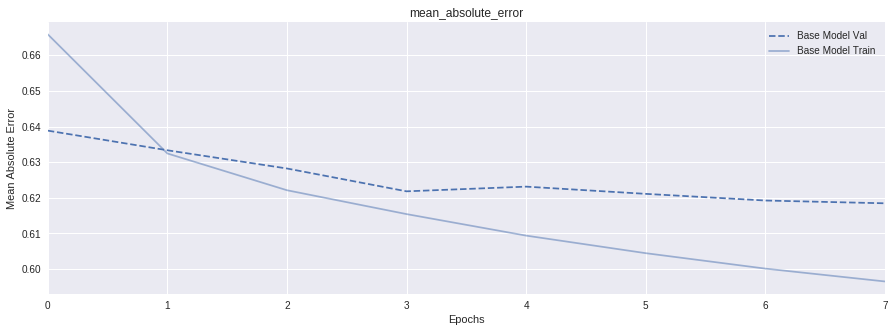

In [12]:
history_FS = (15, 5)
def plot_history(histories, keys=('mean_absolute_error',), train=True, figsize=history_FS):
    if isinstance(histories, tf.keras.callbacks.History):
        histories = [ ('', histories) ]
    for key in keys:
        plt.figure(figsize=history_FS)
        for name, history in histories:
            val = plt.plot(history.epoch, history.history['val_'+key],
                           '--', label=str(name).title()+' Val')
            if train:
                plt.plot(history.epoch, history.history[key], color=val[0].get_color(), alpha=.5,
                         label=str(name).title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.title(key)

        plt.xlim([0,max(max(history.epoch) for (_, history) in histories)])

plot_history([ 
    ('base model', history_8),
])

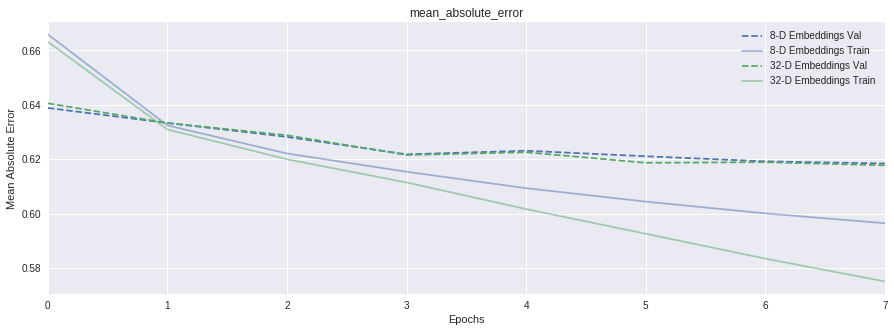

In [13]:
plot_history([ 
    ('8-d embeddings', history_8),
    ('32-d embeddings', history_32),
])

In [14]:
# Example: shrinking movie embeddings and growing user embeddings
history_biguser_smallmovie = build_and_train_model(movie_embedding_size=13, user_embedding_size=19)

Train on 1926262 samples, validate on 101383 samples
Epoch 1/8
 - 6s - loss: 0.7398 - mean_absolute_error: 0.6610 - val_loss: 0.6922 - val_mean_absolute_error: 0.6366
Epoch 2/8
 - 6s - loss: 0.6746 - mean_absolute_error: 0.6295 - val_loss: 0.6768 - val_mean_absolute_error: 0.6337
Epoch 3/8
 - 6s - loss: 0.6522 - mean_absolute_error: 0.6188 - val_loss: 0.6693 - val_mean_absolute_error: 0.6281
Epoch 4/8
 - 6s - loss: 0.6317 - mean_absolute_error: 0.6089 - val_loss: 0.6580 - val_mean_absolute_error: 0.6198
Epoch 5/8
 - 6s - loss: 0.6111 - mean_absolute_error: 0.5987 - val_loss: 0.6526 - val_mean_absolute_error: 0.6190
Epoch 6/8
 - 6s - loss: 0.5943 - mean_absolute_error: 0.5904 - val_loss: 0.6526 - val_mean_absolute_error: 0.6170
Epoch 7/8
 - 5s - loss: 0.5802 - mean_absolute_error: 0.5832 - val_loss: 0.6518 - val_mean_absolute_error: 0.6166
Epoch 8/8
 - 5s - loss: 0.5682 - mean_absolute_error: 0.5770 - val_loss: 0.6516 - val_mean_absolute_error: 0.6155


In [15]:
user_embedding_size = movie_embedding_size = 8
user_id_input = keras.Input(shape=(1,), name='user_id')
movie_id_input = keras.Input(shape=(1,), name='movie_id')
user_embedded = keras.layers.Embedding(df.userId.max()+1, user_embedding_size, 
                                       input_length=1, name='user_embedding')(user_id_input)
movie_embedded = keras.layers.Embedding(df.movieId.max()+1, movie_embedding_size, 
                                        input_length=1, name='movie_embedding')(movie_id_input)
concatenated = keras.layers.Concatenate()([user_embedded, movie_embedded])
out = keras.layers.Flatten()(concatenated)

# Add one or more hidden layers
for n_hidden in hidden_units:
    out = keras.layers.Dense(n_hidden, activation='relu')(out)

# A single output: our predicted rating (before adding bias)
out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

################################################################################
############################# YOUR CODE GOES HERE! #############################
# TODO: you need to create the variable movie_bias. Its value should be the output of calling a layer.
# I recommend giving the layer that holds your biases a distinctive name (this will help in an upcoming question)
bias_embedded = keras.layers.Embedding(df.movieId.max()+1, 1, input_length=1, name='bias',
                                      )(movie_id_input)
movie_bias = keras.layers.Flatten()(bias_embedded)
################################################################################
out = keras.layers.Add()([out, movie_bias])

model_bias = keras.Model(
    inputs = [user_id_input, movie_id_input],
    outputs = out,
)
model_bias.compile(
    tf.train.AdamOptimizer(LR),
    loss='MSE',
    metrics=['MAE'],
)
model_bias.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 8)         124736      user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 8)         25272       movie_id[0][0]                   
__________________________________________________________________________________________________
concatenat

In [16]:
history_bias = model_bias.fit(
    [df.userId, df.movieId],
    df.y,
    batch_size=5 * 10**3,
    epochs=EPOCHS,
    verbose=2,
    validation_split=.05,
);

Train on 1926262 samples, validate on 101383 samples
Epoch 1/8
 - 5s - loss: 0.7559 - mean_absolute_error: 0.6715 - val_loss: 0.6998 - val_mean_absolute_error: 0.6425
Epoch 2/8
 - 4s - loss: 0.6832 - mean_absolute_error: 0.6346 - val_loss: 0.6788 - val_mean_absolute_error: 0.6303
Epoch 3/8
 - 4s - loss: 0.6619 - mean_absolute_error: 0.6240 - val_loss: 0.6735 - val_mean_absolute_error: 0.6299
Epoch 4/8
 - 4s - loss: 0.6476 - mean_absolute_error: 0.6170 - val_loss: 0.6675 - val_mean_absolute_error: 0.6245
Epoch 5/8
 - 5s - loss: 0.6348 - mean_absolute_error: 0.6106 - val_loss: 0.6638 - val_mean_absolute_error: 0.6224
Epoch 6/8
 - 4s - loss: 0.6224 - mean_absolute_error: 0.6045 - val_loss: 0.6612 - val_mean_absolute_error: 0.6214
Epoch 7/8
 - 5s - loss: 0.6125 - mean_absolute_error: 0.5997 - val_loss: 0.6629 - val_mean_absolute_error: 0.6218
Epoch 8/8
 - 4s - loss: 0.6045 - mean_absolute_error: 0.5958 - val_loss: 0.6604 - val_mean_absolute_error: 0.6198


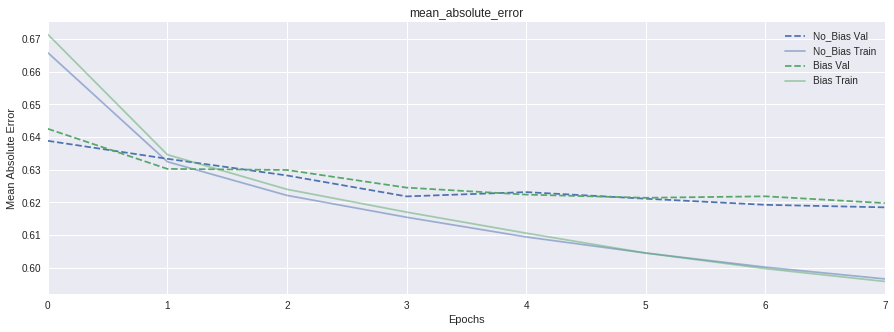

In [17]:
plot_history([ 
    ('no_bias', history_8),
    ('bias', history_bias),
]);